# Model 2: XGBoost

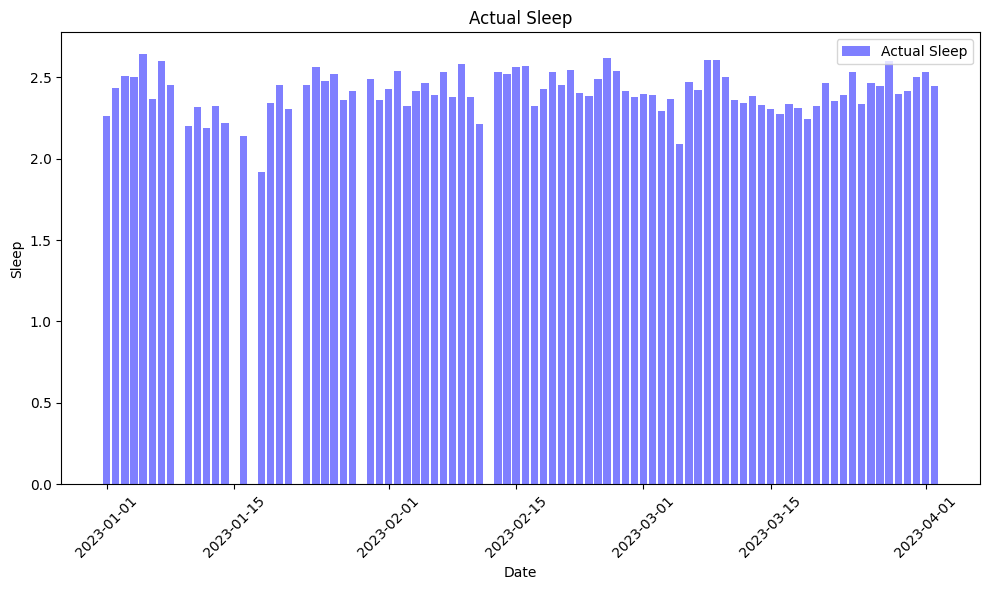

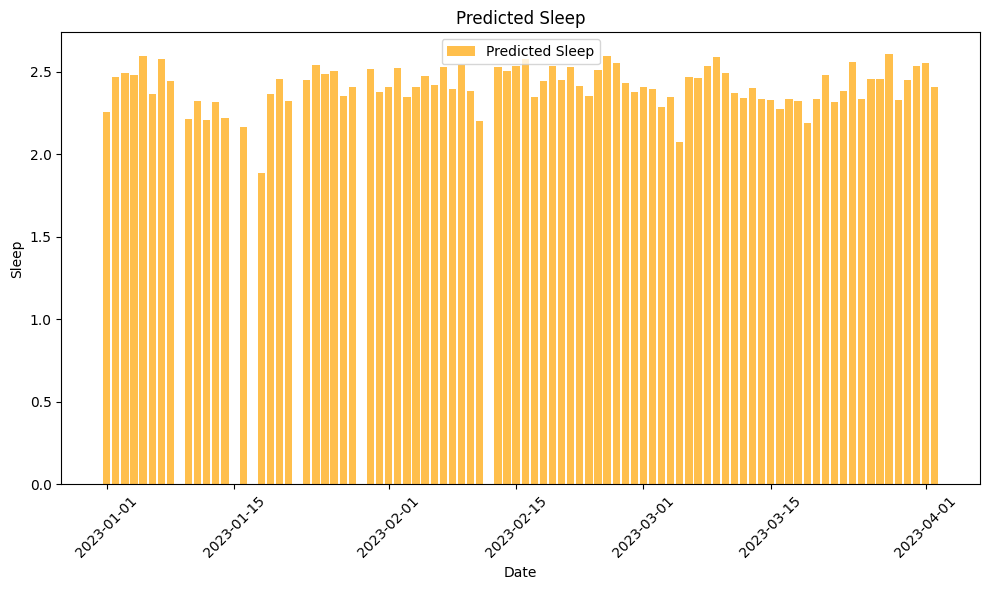

**********  Result for   XGBoost Regression ************
Mean Squared Error (MSE): 0.0004800308844809106
Mean Absolute Error (MAE): 0.017003414437138757
R-squared (R2) Score: 0.9696869506759216


In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


def regressionModelEvaluation(x_train, y_train, x_test, y_test, dates, y_pred=None, method=""):
    # Initialize XGBoost regressor
    clf = xgb.XGBRegressor(objective='reg:squarederror', random_state=0)

    # Train the model
    clf.fit(x_train, y_train)

    # Make predictions if y_pred is not provided
    if y_pred is None:
        y_pred = clf.predict(x_test)

    # Evaluate predictions
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Ploting graph for each modality (bar graph)
    # Plot actual sleep values
    if len(y_test) > 0:
        plt.figure(figsize=(10, 6))
        plt.bar(dates, y_test, color='blue', alpha=0.5, label='Actual Sleep')
        plt.xlabel('Date')
        plt.ylabel('Sleep')
        plt.title('Actual Sleep')
        plt.legend()
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    # Plot predicted sleep values
    if len(y_pred) > 0:
        plt.figure(figsize=(10, 6))
        plt.bar(dates, y_pred, color='orange', alpha=0.7, label='Predicted Sleep')
        plt.xlabel('Date')
        plt.ylabel('Sleep')
        plt.title('Predicted Sleep')
        plt.legend()
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    print("=" * 50)
    print("**********  Result for  ", method, "************")
    print("Mean Squared Error (MSE):", mse)
    print("Mean Absolute Error (MAE):", mae)
    print("R-squared (R2) Score:", r2)


# Loading dataset
df = pd.read_csv("imputed_data_b.csv")

# Converting "Date" column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Specify the athlete player and date range for prediction, selected date range: whole 2023 year
athlete_player = 21
start_date = pd.to_datetime("1/1/2023", format='%m/%d/%Y')
end_date = pd.to_datetime("04/02/2023", format='%m/%d/%Y')
#start_date = pd.to_datetime("3/27/2023", format='%m/%d/%Y')
#end_date = pd.to_datetime("04/02/2023", format='%m/%d/%Y')

# Filter the dataset for prediction
prediction_df = df[(df['Athlete'] == athlete_player) & (df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Filter the dataset for training
training_df = df[(df['Date'] < start_date)]


# Separate features and target variable for prediction
X_pred = prediction_df.drop(["Sleep", "Date", "Athlete"], axis=1)
y_pred = prediction_df["Sleep"]
dates_pred = prediction_df["Date"]

# Use 100% of the training data for training
X_train = training_df.drop(["Sleep", "Date", "Athlete"], axis=1)
y_train = training_df["Sleep"]

# Call the evaluation function
regressionModelEvaluation(X_train, y_train, X_pred, y_pred, dates_pred, method="XGBoost Regression")


# Model 3: XGBoost + Random Forest

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


def regressionModelEvaluation(x_train, y_train, x_test, y_test, dates, y_pred=None, method="", column=""):
    # Initialize XGBoost regressor
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=0)

    # Initialize Random Forest regressor
    rf_model = RandomForestRegressor(random_state=0)

    # Train the models
    xgb_model.fit(x_train, y_train)
    rf_model.fit(x_train, y_train)

    # Make predictions if y_pred is not provided
    if y_pred is None:
        y_pred_xgb = xgb_model.predict(x_test)
        y_pred_rf = rf_model.predict(x_test)
        y_pred = (y_pred_xgb + y_pred_rf) / 2  # Average predictions from both models

    # Evaluate predictions
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Saving plot points to a CSV file
    plot_data = pd.DataFrame({'Date': dates, 'Actual': y_test, 'Predicted': y_pred})
    plot_data.to_csv(f'{column}_plot_data.csv', index=False)

    print("=" * 50)
    print("**********  Result for  ", method, "************")
    print("Mean Squared Error (MSE):", mse)
    print("Mean Absolute Error (MAE):", mae)
    print("R-squared (R2) Score:", r2)


# Load dataset
df = pd.read_csv("imputed_data_b.csv")

# Convert "Date" column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Specify the athlete player and date range for prediction, selected date range: whole 2023 year
athlete_player = 21
start_date = pd.to_datetime("1/1/2023", format='%m/%d/%Y')
end_date = pd.to_datetime("04/02/2023", format='%m/%d/%Y')

# Filter the dataset for prediction
prediction_df = df[(df['Athlete'] == athlete_player) & (df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Filter the dataset for training
training_df = df[(df['Date'] < start_date)]

# Iterate over each column to predict and evaluate
for column in ["Sleep", "Training", "Cardiac Rhythm", "Jump", "Cognitive"]:
    # Separate features and target variable for prediction
    X_pred = prediction_df.drop([column, "Date", "Athlete"], axis=1)
    y_pred = prediction_df[column]
    dates_pred = prediction_df["Date"]

    # Use 100% of the training data for training
    X_train = training_df.drop([column, "Date", "Athlete"], axis=1)
    y_train = training_df[column]

    # Call the evaluation function for the current column
    regressionModelEvaluation(X_train, y_train, X_pred, y_pred, dates_pred, method=f"Ensemble (XGBoost + Random Forest) - {column}", column=column)






**********  Result for   Ensemble (XGBoost + Random Forest) - Sleep ************
Mean Squared Error (MSE): 0.0006646581993630029
Mean Absolute Error (MAE): 0.020213363755949173
R-squared (R2) Score: 0.958028082291557
**********  Result for   Ensemble (XGBoost + Random Forest) - Training ************
Mean Squared Error (MSE): 1.409835808159833
Mean Absolute Error (MAE): 0.9071923197495607
R-squared (R2) Score: 0.998650244784118
**********  Result for   Ensemble (XGBoost + Random Forest) - Cardiac Rhythm ************
Mean Squared Error (MSE): 0.040519808708974356
Mean Absolute Error (MAE): 0.14391843467535034
R-squared (R2) Score: 0.9781343319527719
**********  Result for   Ensemble (XGBoost + Random Forest) - Jump ************
Mean Squared Error (MSE): 0.1026408679906209
Mean Absolute Error (MAE): 0.18148709283589526
R-squared (R2) Score: 0.999858865852788
**********  Result for   Ensemble (XGBoost + Random Forest) - Cognitive ************
Mean Squared Error (MSE): 0.2953410007209885
Me

# Model 4: Stacking | GBM + XGBoost

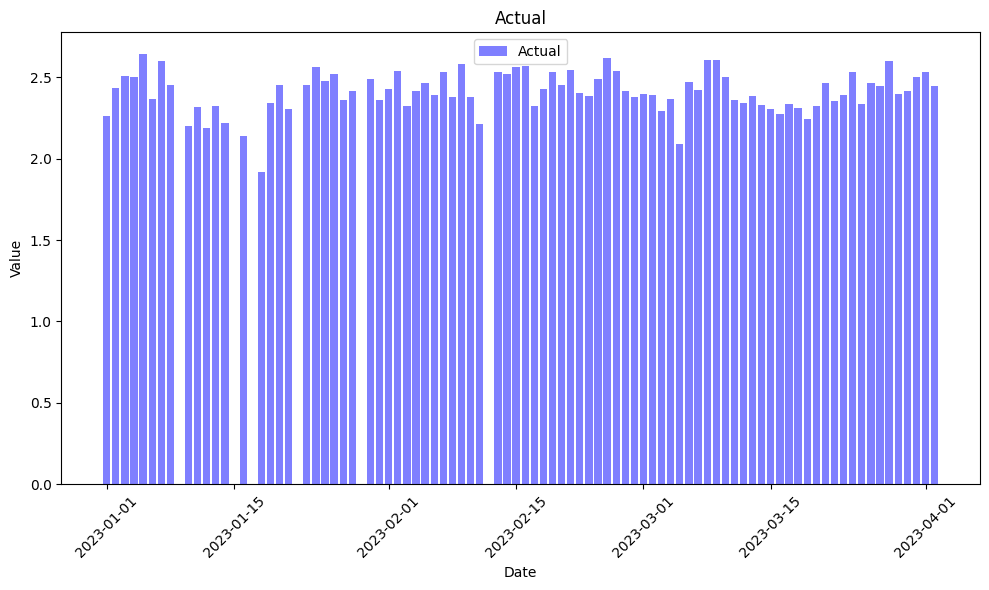

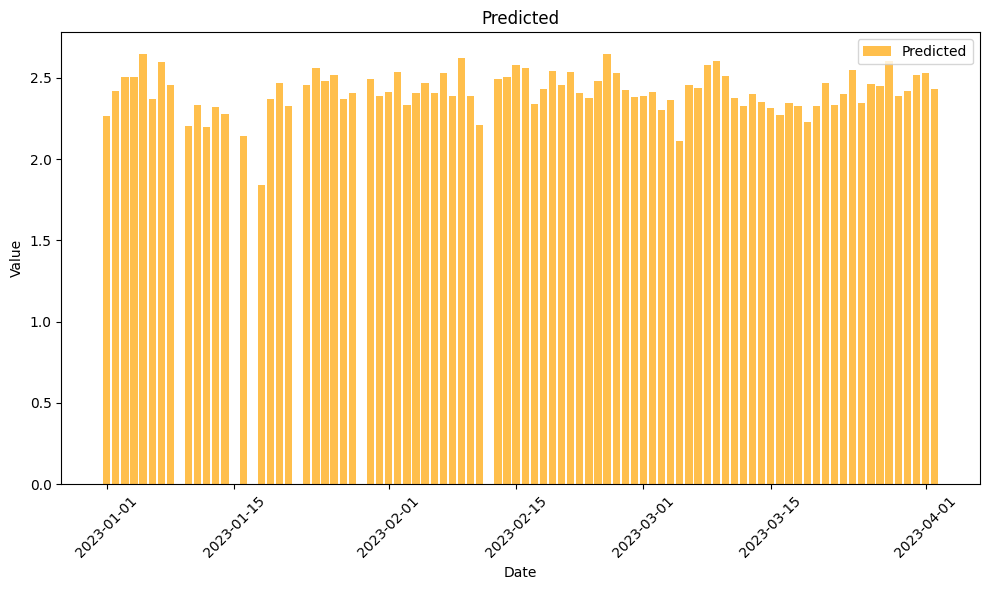

**********  Result for   Stacking (GBM + XGBoost) - Sleep ************
Mean Squared Error (MSE): 0.00029704531025366376
Mean Absolute Error (MAE): 0.01226571958994311
R-squared (R2) Score: 0.981242146219524


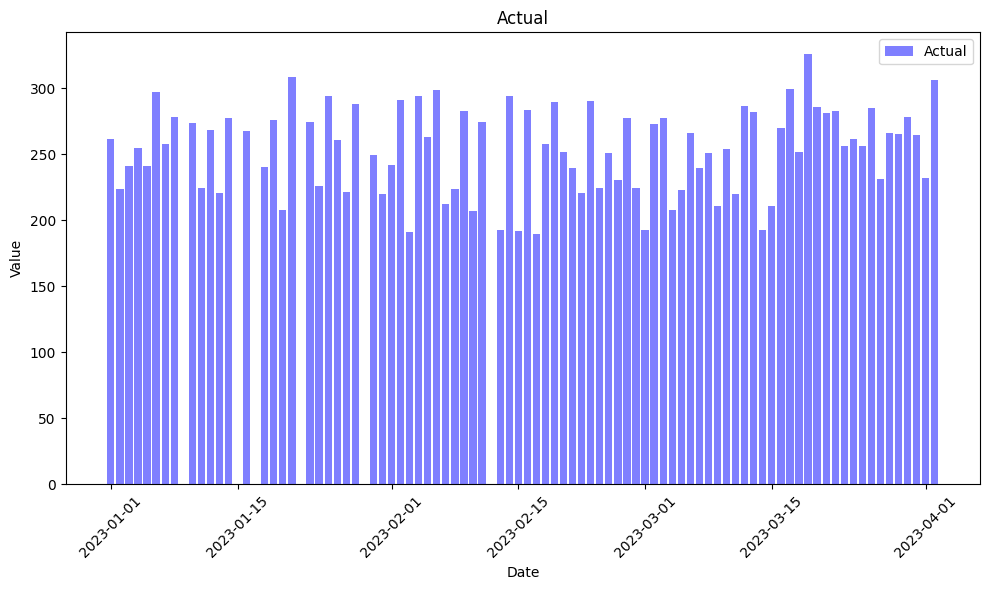

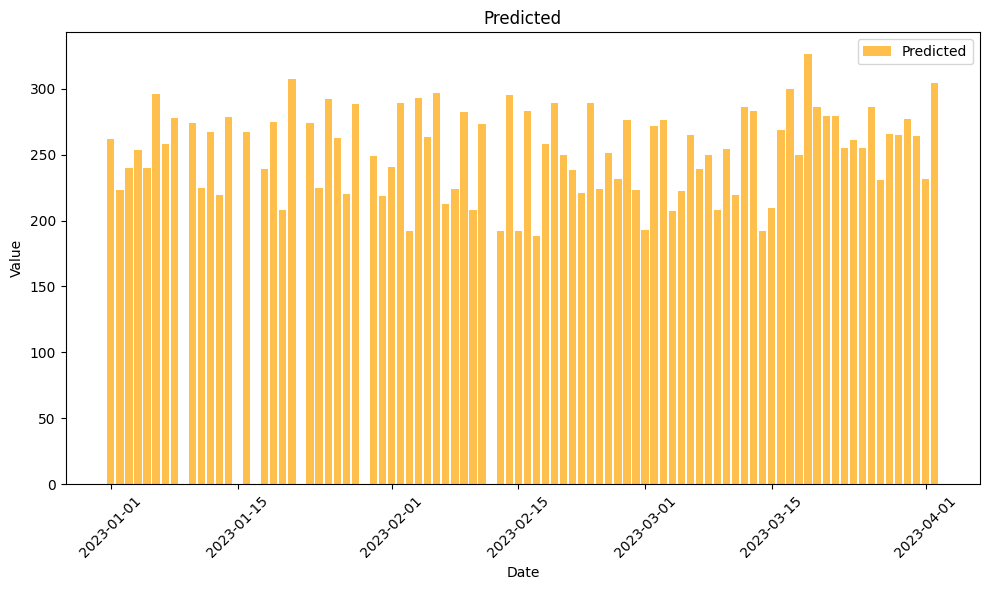

**********  Result for   Stacking (GBM + XGBoost) - Training ************
Mean Squared Error (MSE): 1.0239669335230552
Mean Absolute Error (MAE): 0.8212425733800436
R-squared (R2) Score: 0.9990196697364231


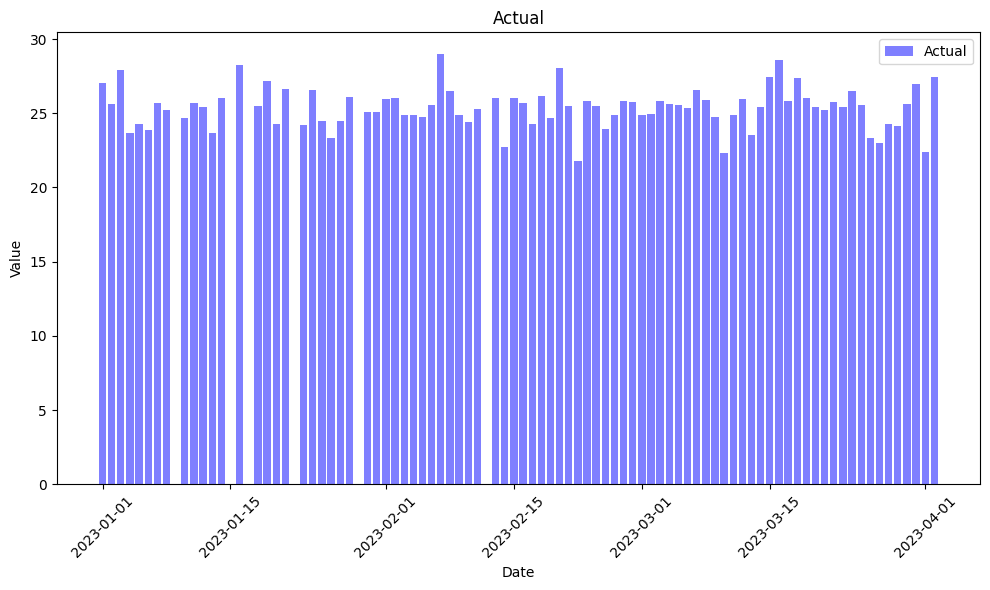

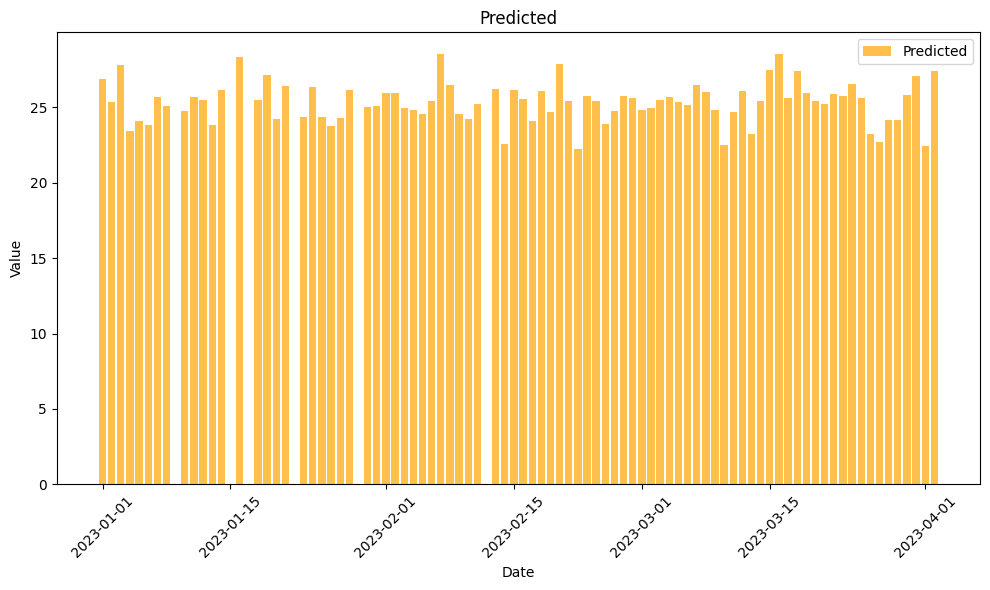

**********  Result for   Stacking (GBM + XGBoost) - Cardiac Rhythm ************
Mean Squared Error (MSE): 0.023678679119138735
Mean Absolute Error (MAE): 0.11592114914295304
R-squared (R2) Score: 0.9872222956151013


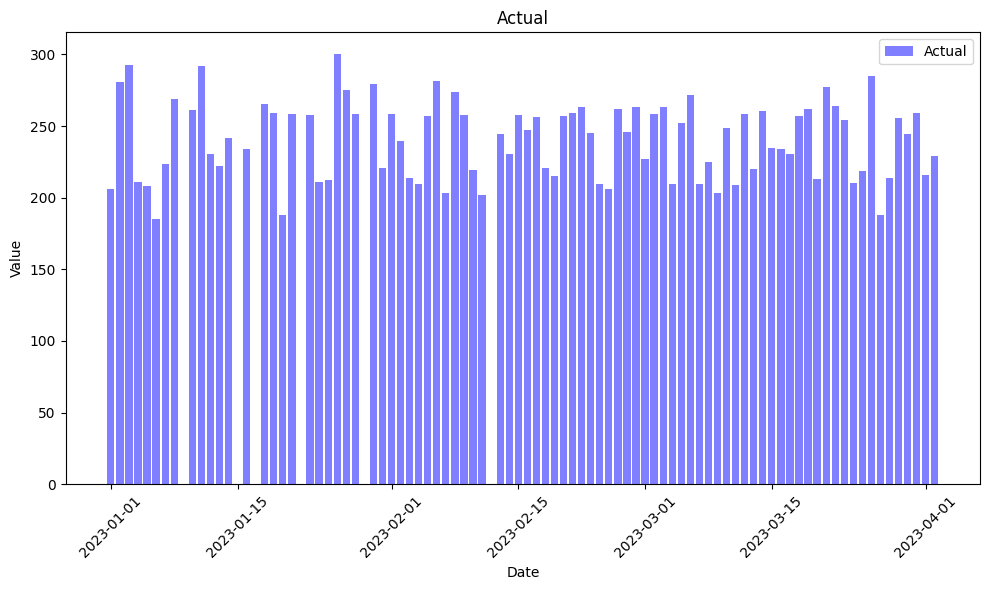

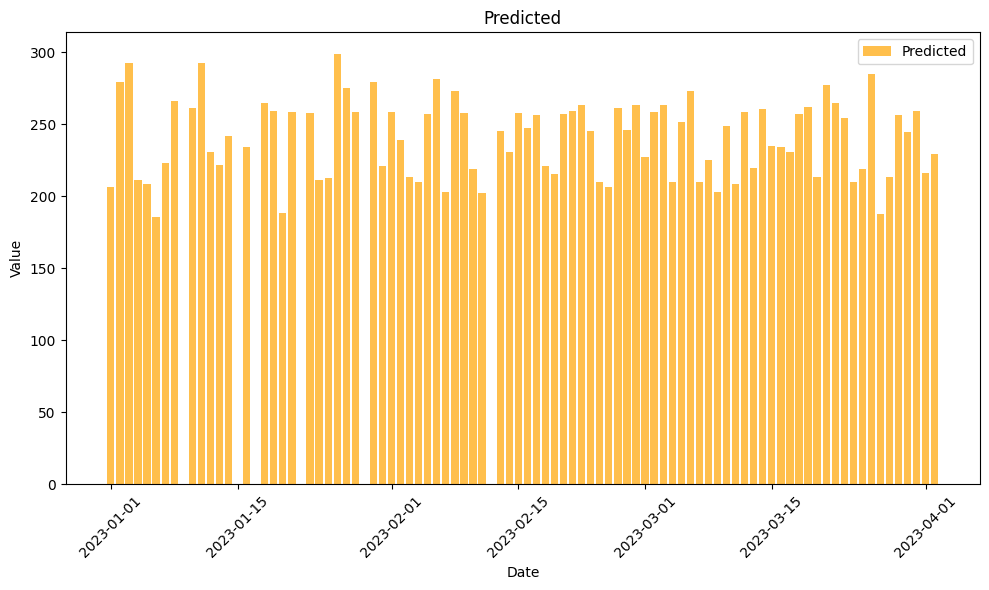

**********  Result for   Stacking (GBM + XGBoost) - Jump ************
Mean Squared Error (MSE): 0.213956789186569
Mean Absolute Error (MAE): 0.21262912313771698
R-squared (R2) Score: 0.9997058032577744


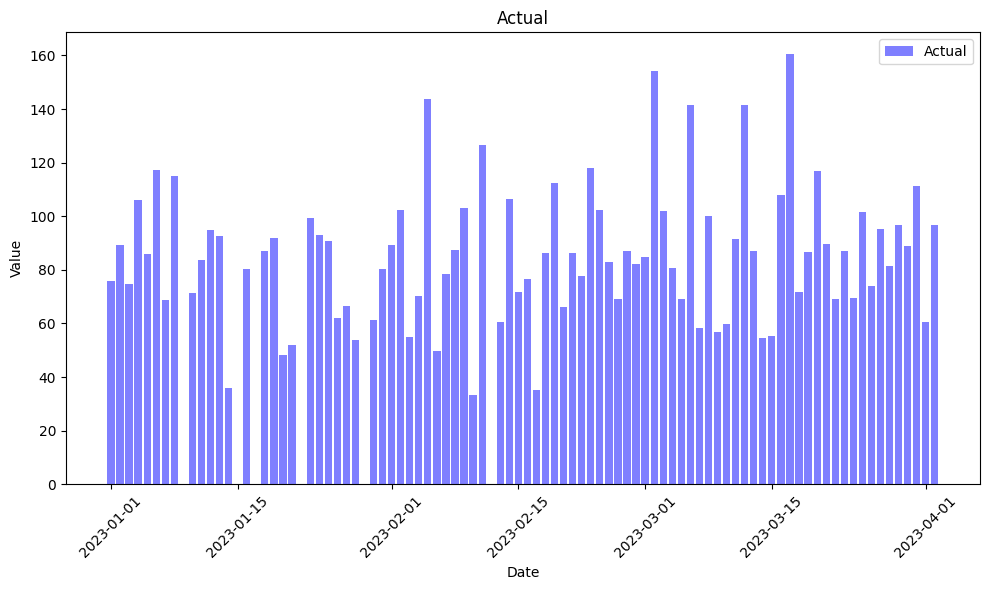

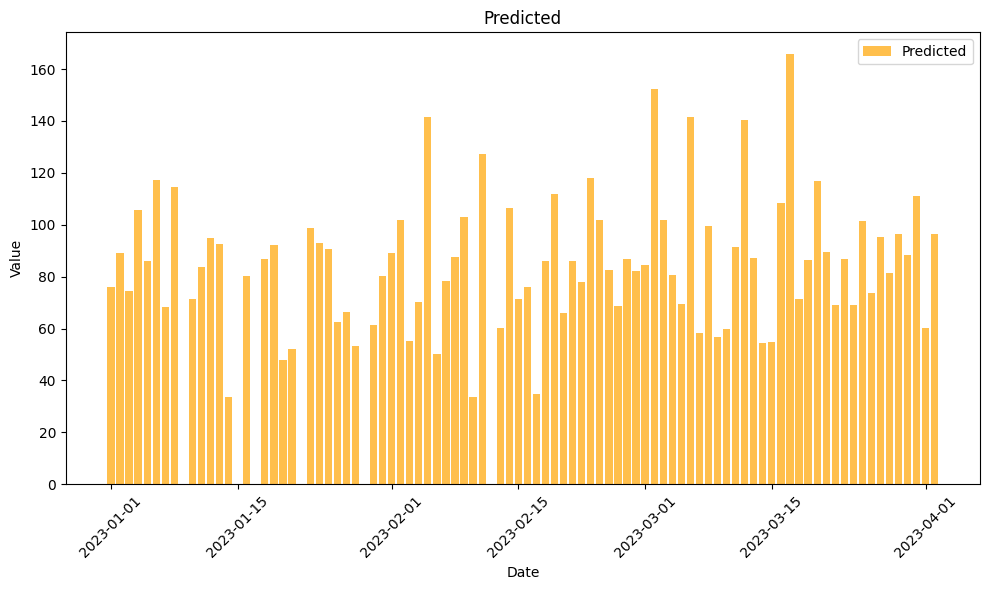

**********  Result for   Stacking (GBM + XGBoost) - Cognitive ************
Mean Squared Error (MSE): 0.5565774209278642
Mean Absolute Error (MAE): 0.3397624097551634
R-squared (R2) Score: 0.9991202503349993


In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

def stackingModelEvaluation(models, meta_model, x_train, y_train, x_test, y_test, dates, method=""):
    # Initialize lists to store meta-features for training and testing data
    train_meta_features = np.zeros((len(y_train), len(models)))
    test_meta_features = np.zeros((len(y_test), len(models)))

    # Perform K-fold cross-validation to generate meta-features
    kf = KFold(n_splits=5, shuffle=True, random_state=0)
    for i, (train_index, val_index) in enumerate(kf.split(x_train)):
        x_tr, x_val = x_train.iloc[train_index], x_train.iloc[val_index]
        y_tr, y_val = y_train.iloc[train_index], y_train.iloc[val_index]

        # Train base models on the training fold
        for j, model in enumerate(models):
            model.fit(x_tr, y_tr)
            train_meta_features[val_index, j] = model.predict(x_val)
            test_meta_features[:, j] += model.predict(x_test) / kf.n_splits

    # Train meta-model on meta-features
    meta_model.fit(train_meta_features, y_train)

    # Make predictions using meta-model
    y_pred = meta_model.predict(test_meta_features)

    # Evaluate predictions
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Ploting graph for each modality (bar graph)
    # Plot actual values
    plt.figure(figsize=(10, 6))
    plt.bar(dates, y_test, color='blue', alpha=0.5, label='Actual')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title('Actual')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Plot predicted values
    plt.figure(figsize=(10, 6))
    plt.bar(dates, y_pred, color='orange', alpha=0.7, label='Predicted')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title('Predicted')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    print("=" * 50)
    print("**********  Result for  ", method, "************")
    print("Mean Squared Error (MSE):", mse)
    print("Mean Absolute Error (MAE):", mae)
    print("R-squared (R2) Score:", r2)


# Load dataset
df = pd.read_csv("imputed_data_b.csv")

# Convert "Date" column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')


# Specify the athlete player and date range for prediction, selected date range: whole 2023 year
athlete_player = 21
start_date = pd.to_datetime("1/1/2023", format='%m/%d/%Y')
end_date = pd.to_datetime("04/02/2023", format='%m/%d/%Y')

# Filter the dataset for prediction
prediction_df = df[(df['Athlete'] == athlete_player) & (df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Filter the dataset for training
training_df = df[(df['Date'] < start_date)]

# Define base models (Gradient Boosting Machines)
gbm_model = GradientBoostingRegressor(random_state=0)
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=0)

# Define meta-model (XGBoost)
meta_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=0)

# Iterate over each column to predict and evaluate
for column in ["Sleep", "Training", "Cardiac Rhythm", "Jump", "Cognitive"]:
    # Separate features and target variable for prediction
    X_pred = prediction_df.drop([column, "Date", "Athlete"], axis=1)
    y_pred = prediction_df[column]
    dates_pred = prediction_df["Date"]

    # Use 100% of the training data for training
    X_train = training_df.drop([column, "Date", "Athlete"], axis=1)
    y_train = training_df[column]

    # Call the evaluation function for the current column
    stackingModelEvaluation([gbm_model, xgb_model], meta_model, X_train, y_train, X_pred, y_pred, dates_pred, method=f"Stacking (GBM + XGBoost) - {column}")


# Model 5: Ensemble | XGBoost + Random Forest + Gradient Boosting

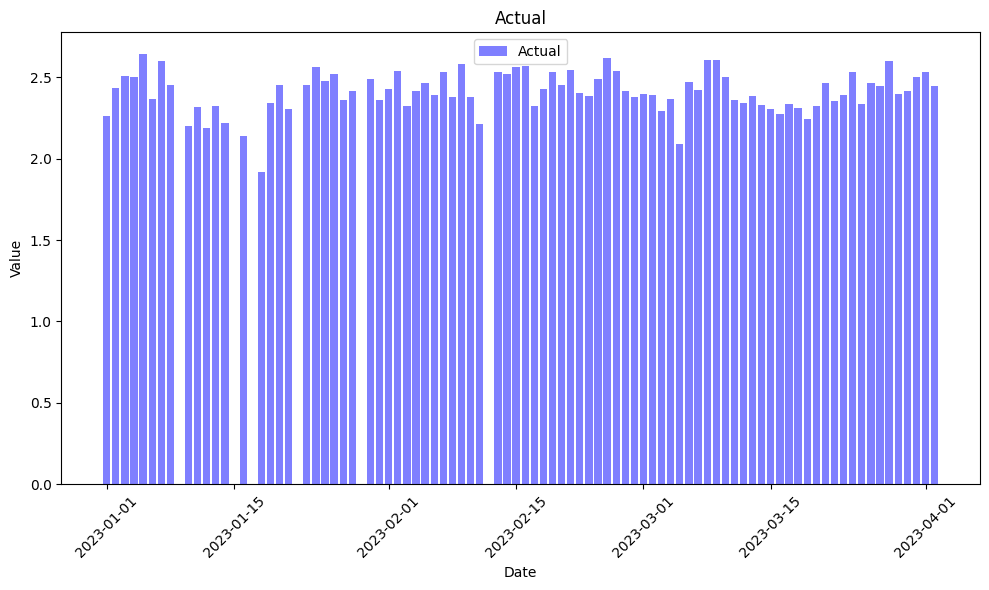

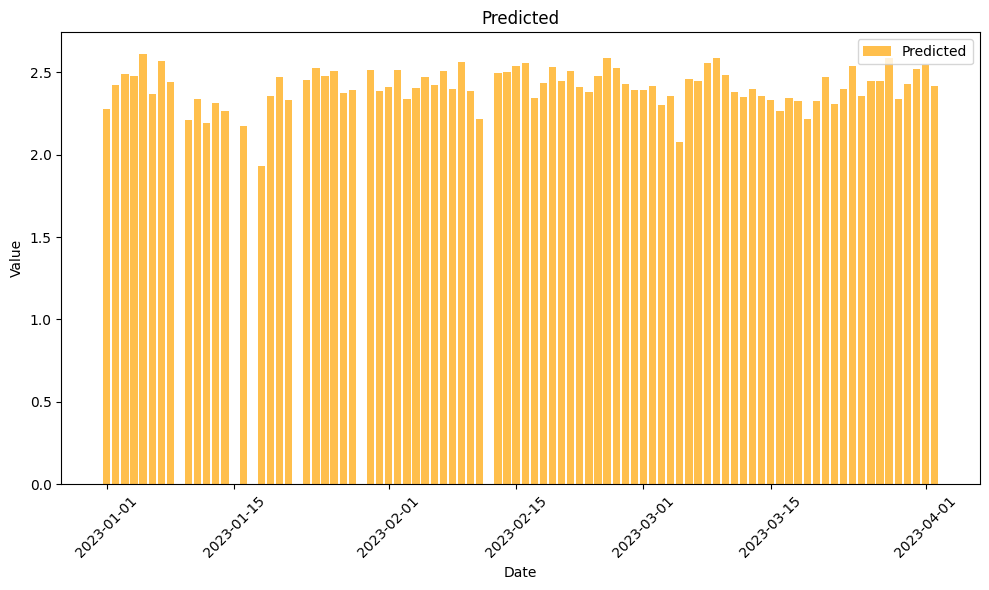

**********  Result for   Ensemble (XGBoost + Random Forest + Gradient Boosting) - Sleep ************
Mean Squared Error (MSE): 0.0004421050826814072
Mean Absolute Error (MAE): 0.01739228738225392
R-squared (R2) Score: 0.9720818938718094


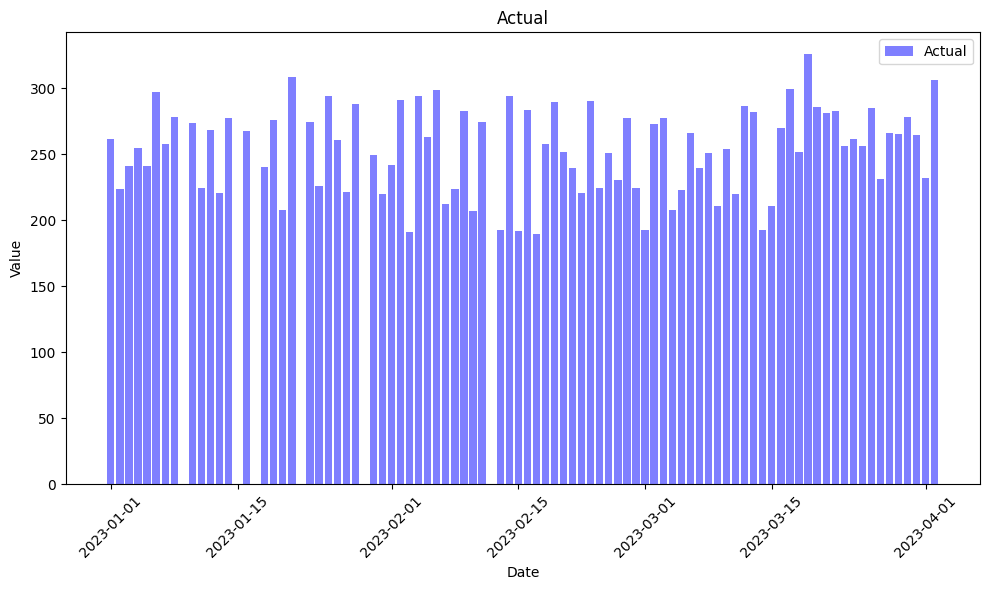

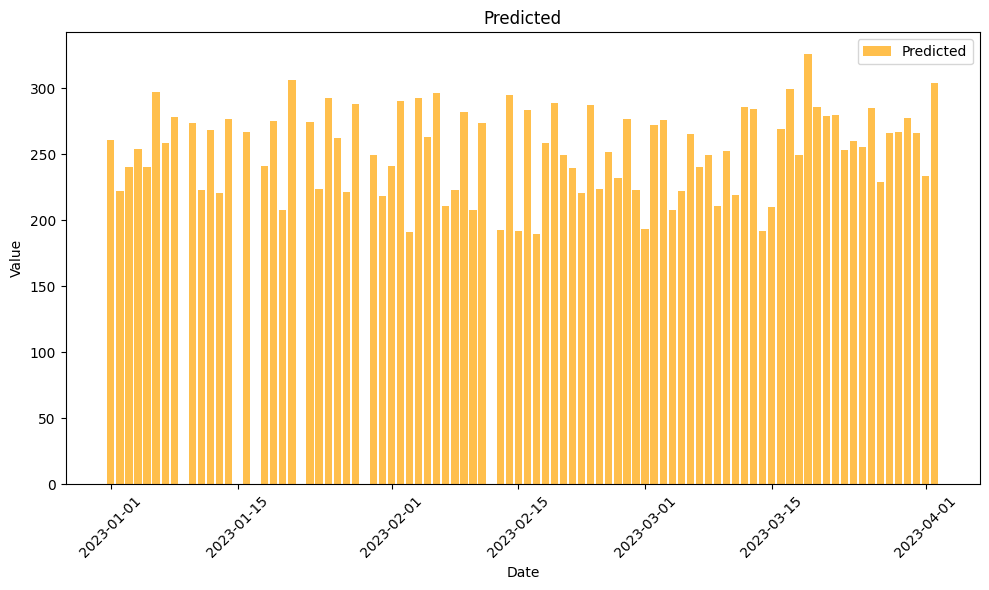

**********  Result for   Ensemble (XGBoost + Random Forest + Gradient Boosting) - Training ************
Mean Squared Error (MSE): 1.392817613183214
Mean Absolute Error (MAE): 0.9202882894934101
R-squared (R2) Score: 0.9986665377434127


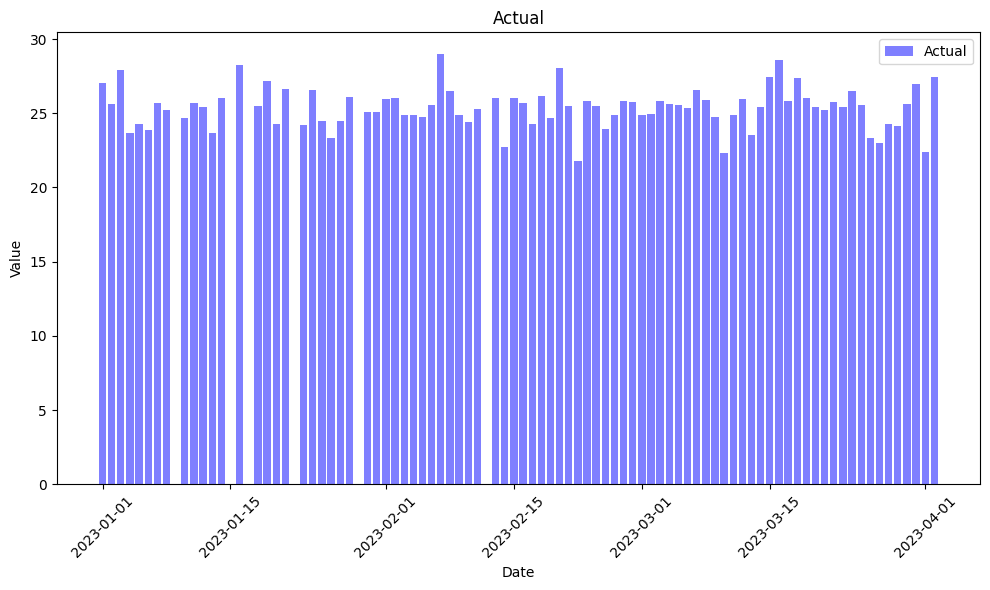

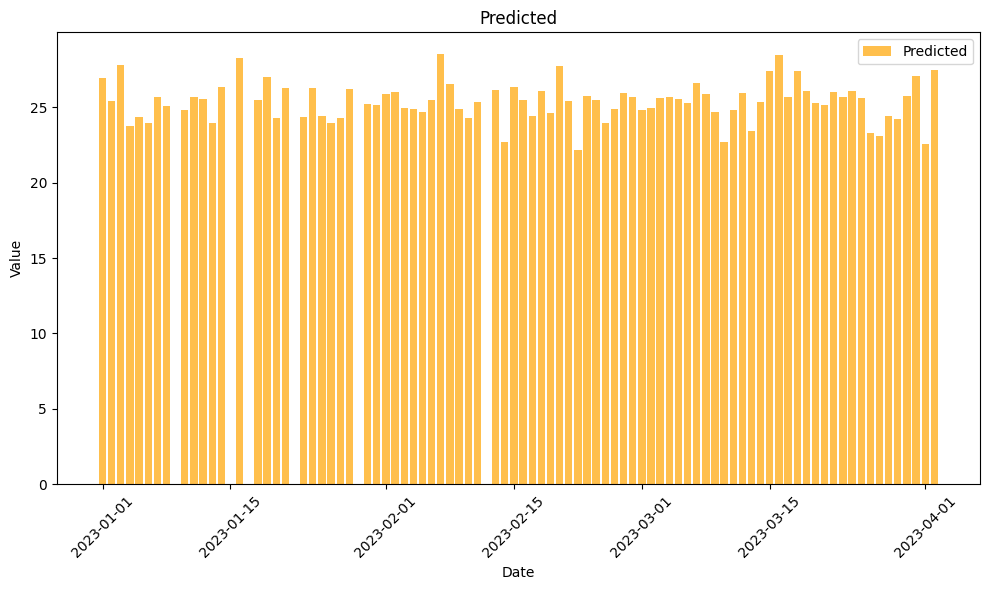

**********  Result for   Ensemble (XGBoost + Random Forest + Gradient Boosting) - Cardiac Rhythm ************
Mean Squared Error (MSE): 0.027220779711094517
Mean Absolute Error (MAE): 0.11664420656017394
R-squared (R2) Score: 0.9853108750481913


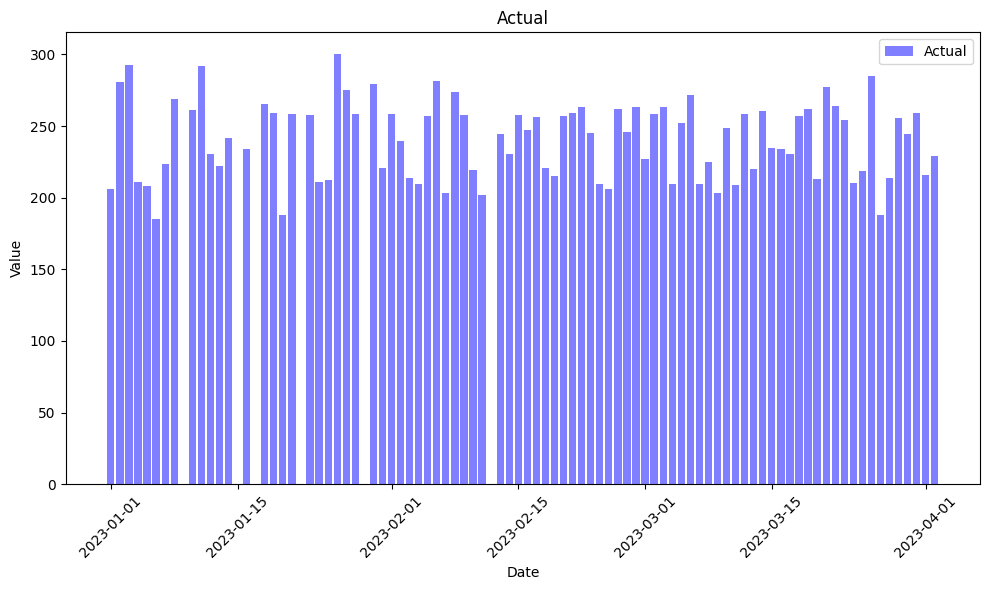

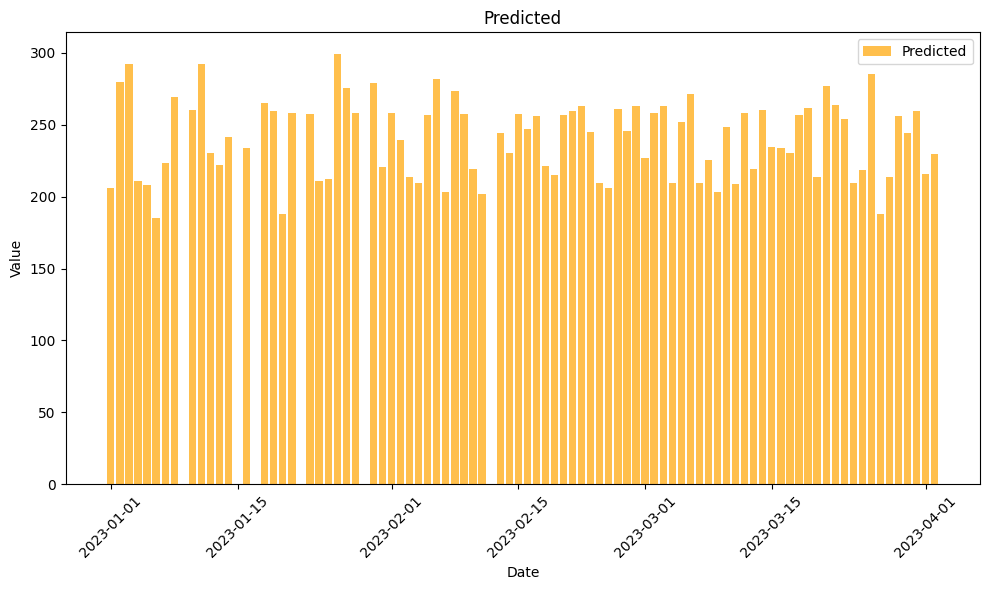

**********  Result for   Ensemble (XGBoost + Random Forest + Gradient Boosting) - Jump ************
Mean Squared Error (MSE): 0.05041944824580092
Mean Absolute Error (MAE): 0.13902677571139635
R-squared (R2) Score: 0.9999306718077275


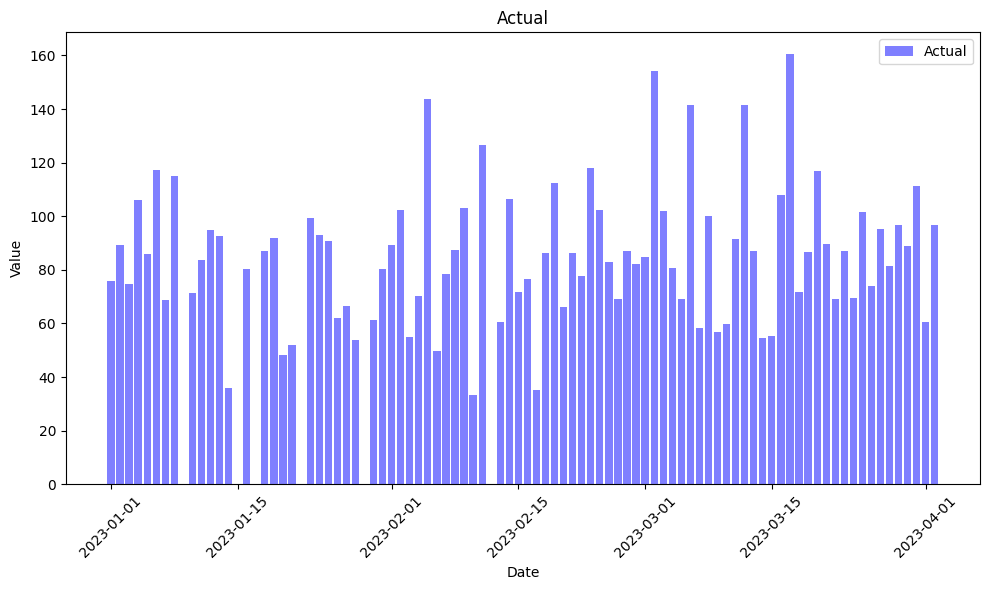

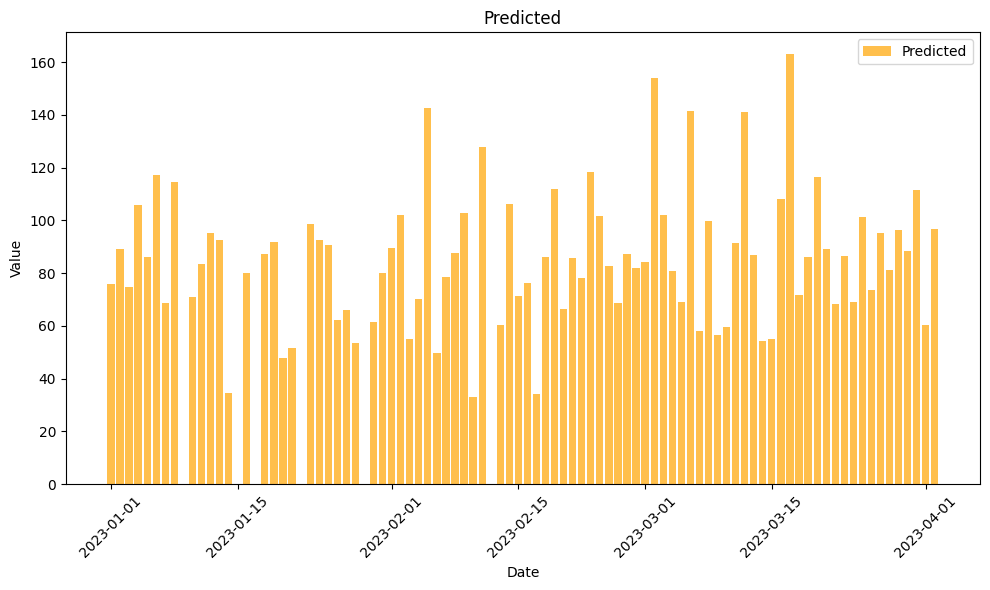

**********  Result for   Ensemble (XGBoost + Random Forest + Gradient Boosting) - Cognitive ************
Mean Squared Error (MSE): 0.22554022804896515
Mean Absolute Error (MAE): 0.32613110029213266
R-squared (R2) Score: 0.999643501635874


In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


def regressionModelEvaluation(x_train, y_train, x_test, y_test, dates, y_pred=None, method=""):
    # Initialize XGBoost regressor
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=0)

    # Initialize Random Forest regressor
    rf_model = RandomForestRegressor(random_state=0)

    # Initialize Gradient Boosting regressor
    gb_model = GradientBoostingRegressor(random_state=0)

    # Train the models
    xgb_model.fit(x_train, y_train)
    rf_model.fit(x_train, y_train)
    gb_model.fit(x_train, y_train)

    # Make predictions if y_pred is not provided
    if y_pred is None:
        y_pred_xgb = xgb_model.predict(x_test)
        y_pred_rf = rf_model.predict(x_test)
        y_pred_gb = gb_model.predict(x_test)
        y_pred = (y_pred_xgb + y_pred_rf + y_pred_gb) / 3  # Average predictions from all models

    # Evaluate predictions
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    # Ploting graph for each modality (bar graph)
    # Plot actual values
    plt.figure(figsize=(10, 6))
    plt.bar(dates, y_test, color='blue', alpha=0.5, label='Actual')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title('Actual')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Plot predicted values
    plt.figure(figsize=(10, 6))
    plt.bar(dates, y_pred, color='orange', alpha=0.7, label='Predicted')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title('Predicted')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    print("=" * 50)
    print("**********  Result for  ", method, "************")
    print("Mean Squared Error (MSE):", mse)
    print("Mean Absolute Error (MAE):", mae)
    print("R-squared (R2) Score:", r2)


# Load dataset
df = pd.read_csv("imputed_data_b.csv")

# Convert "Date" column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')


# Specify the athlete player and date range for prediction, selected date range: whole 2023 year
athlete_player = 21
start_date = pd.to_datetime("1/1/2023", format='%m/%d/%Y')
end_date = pd.to_datetime("04/02/2023", format='%m/%d/%Y')

# Filter the dataset for prediction
prediction_df = df[(df['Athlete'] == athlete_player) & (df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Filter the dataset for training
training_df = df[(df['Date'] < start_date)]

# Iterate over each column to predict and evaluate
for column in ["Sleep", "Training", "Cardiac Rhythm", "Jump", "Cognitive"]:
    # Separate features and target variable for prediction
    X_pred = prediction_df.drop([column, "Date", "Athlete"], axis=1)
    y_pred = prediction_df[column]
    dates_pred = prediction_df["Date"]

    # Use 100% of the training data for training
    X_train = training_df.drop([column, "Date", "Athlete"], axis=1)
    y_train = training_df[column]

    # Call the evaluation function for the current column
    regressionModelEvaluation(X_train, y_train, X_pred, y_pred, dates_pred, method=f"Ensemble (XGBoost + Random Forest + Gradient Boosting) - {column}")


In [ ]:
# Exporting updated datasets to CSV
prediction_df.to_csv("prediction_dataset.csv", index=False)
training_df.to_csv("training_dataset.csv", index=False)

from google.colab import files

# Download new updated dataset
files.download("prediction_dataset.csv")
files.download("training_dataset.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files

#dowloading predicted data and actual data from test value for predictive analysis graph
files.download("Cardiac Rhythm_plot_data.csv")
files.download("Cognitive_plot_data.csv")
files.download("Jump_plot_data.csv")
files.download("Sleep_plot_data.csv")
files.download("Training_plot_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>